In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Unique labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


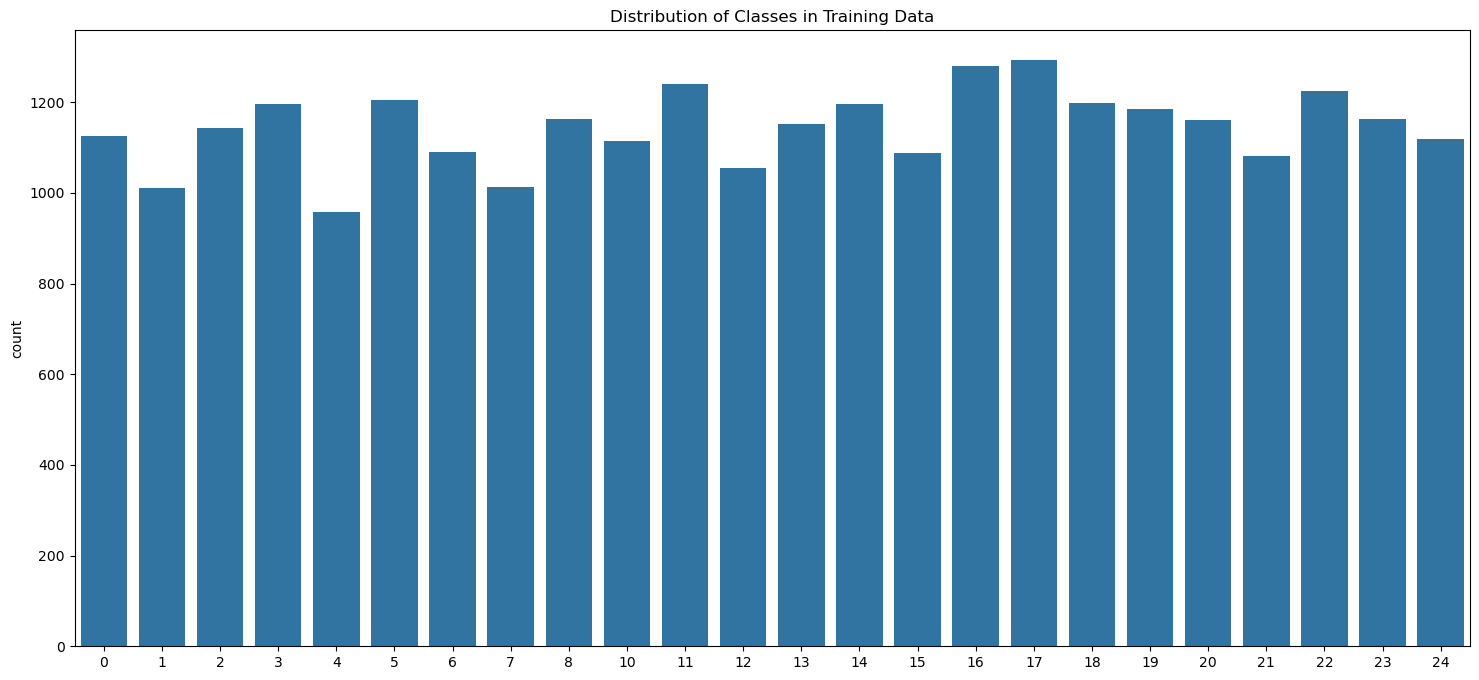

One-hot encoded label: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


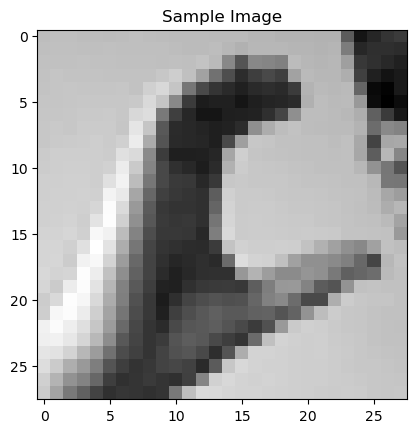

In [2]:
train = pd.read_csv(r"C:\Users\User\Desktop\aml final\sign_mnist_train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\aml final\sign_mnist_test.csv")
train.head()
labels = train['label'].values
unique_val = np.unique(labels)
print(f"Unique labels: {unique_val}")
plt.figure(figsize=(18, 8))
sns.countplot(x=labels)
plt.title("Distribution of Classes in Training Data")
plt.show()
train.drop('label', axis=1, inplace=True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
index = 2
print(f"One-hot encoded label: {labels[index]}")
plt.imshow(images[index].reshape(28, 28), cmap='gray')
plt.title("Sample Image")
plt.show()
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample Image", sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

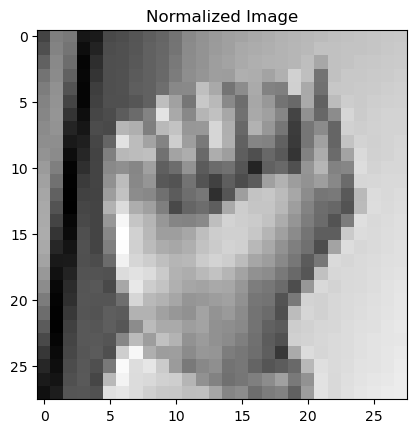

In [3]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title("Normalized Image")
plt.show()

In [4]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(24, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_test, y_test), epochs=50)

Epoch 1/50


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0792 - loss: 3.0841 - val_accuracy: 0.1544 - val_loss: 3.0317
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.2270 - loss: 2.4526 - val_accuracy: 0.3664 - val_loss: 2.5877
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.3549 - loss: 2.0073 - val_accuracy: 0.5917 - val_loss: 1.7239
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.4526 - loss: 1.6530 - val_accuracy: 0.7015 - val_loss: 1.0704
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5183 - loss: 1.4649 - val_accuracy: 0.7698 - val_loss: 0.7427
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.5666 - loss: 1.3131 - val_accuracy: 0.7597 - val_loss: 0.6724
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6158 - loss: 1.1466 - val_accuracy: 0.7732 - val_loss: 0.6777
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6367 - loss: 1.0824 - val_accuracy: 0.845

In [7]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


In [8]:
test_labels = test['label']
test.drop('label', axis=1, inplace=True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images / 255.0
y_pred = model.predict(test_images)
test_labels_classes = np.argmax(test_labels, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
accuracy = accuracy_score(test_labels_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.77%


In [10]:
def get_letter(result): 
    class_labels = { 
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
        10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 
        18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'
    }
    return class_labels.get(result, "Error")

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    roi = frame[100:400, 320:620]
    cv2.imshow('ROI', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = roi.reshape(1, 28, 28, 1) / 255.0
    result = np.argmax(model.predict(roi), axis=1)[0]
    cv2.putText(frame, get_letter(result), (320, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == 13:  # Press Enter to exit
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━